Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaned Dataset:

Dataset Dimensions: (14310, 4)
   Year                 Country Name  GDP (current US$)  \
0  1960  Africa Eastern and Southern       2.421063e+10   
1  1960   Africa Western and Central       1.190495e+10   
2  1960                      Algeria       2.723615e+09   
3  1960                    Australia       1.860768e+10   
4  1960                      Austria       6.624086e+09   

   R&D Expenditure (% of GDP)  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14310 entries, 0 to 14309
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1

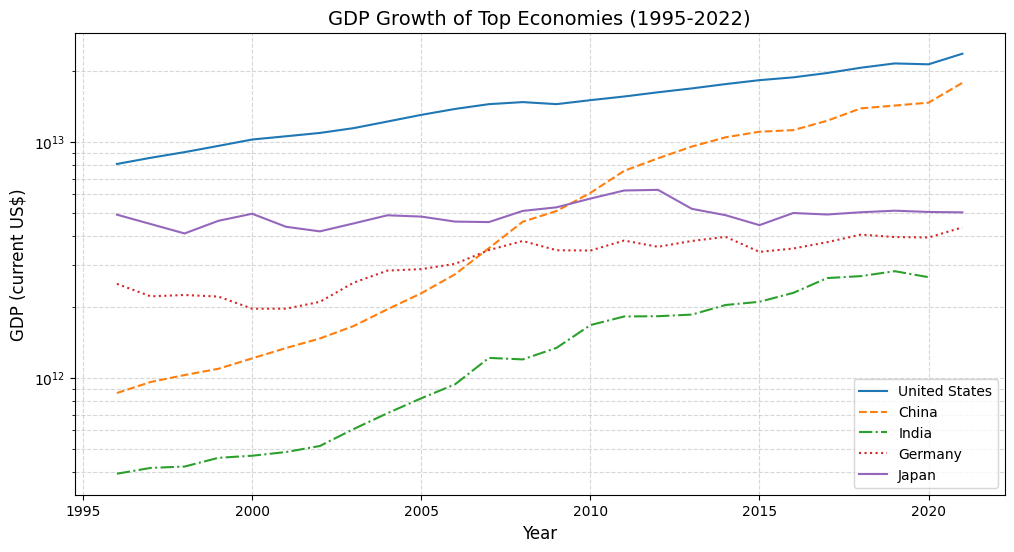

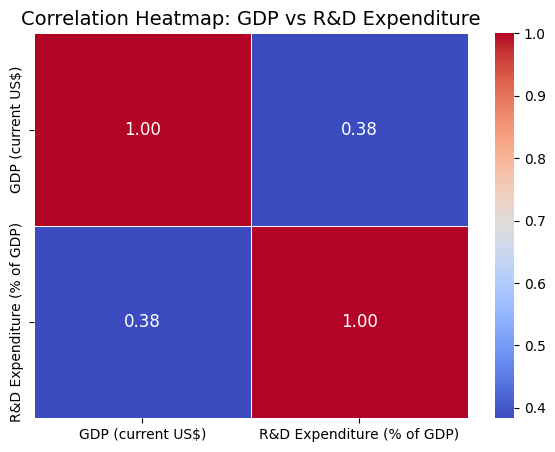


Data Health Assessment:
Total records: 2938
Missing values: 0
Data appears to be clean and suitable for analysis.


In [ ]:
# =====================================================
# Title: Analysis of Research Publications & Their Correlation with National GDP and Development
# Name: Sandhita Das
# Data Source: World Bank Open Data (https://data.worldbank.org/)
# =====================================================

# Importing all the necessary libraries for this project
import pandas as pd  # Pandas is like the king of data manipulation
import numpy as np  # numpy is handy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib is for plotting stuff 📊
import seaborn as sns  # Seaborn makes charts look good

# ----------------------
# 1. Load and Inspect Data
# ----------------------

# Okay, so if we're using Google Colab, we gotta mount Google Drive first.
from google.colab import drive

drive.mount('/content/drive')  # This step links my drive so we can use files stored there

# Now we load the dataset.
# Make sure the path is correct, or else it'll throw an error 😭
file_path = "/content/drive/My Drive/Colab Notebooks/cleaned_gdp_rnd_data.csv"  # Double-check my file path if it gives an error!
merged_data = pd.read_csv(file_path)  # Reading the csv file, easy peasy

# Let's see what we just loaded
print("Cleaned Dataset:")  # A small peek into the data
print(f"\nDataset Dimensions: {merged_data.shape}")  # Shows (rows, columns), This prints the total number of rows and columns in the dataset.
print(merged_data.head())  # Shows the first 5 rows, just to get a feel of it

print("\nDataset Overview:")  # Overall info about the dataset
print(merged_data.info())  # Tells us data types, null values, column names, etc.

print("\nFeature Unique Values:")
print(merged_data.nunique())  # Shows how many unique values per feature. This gives insight into the variability of each column.

# Checking for missing values, bcz if there r too many, we might have issues
print("\nMissing Values:")
print(merged_data.isnull().sum())  # If there are NaNs, we gotta deal with them

# ----------------------
# 2. Data Cleaning and Preprocessing
# ----------------------

# Sometimes, "Year" might be stored as a float/string, so we convert it to int 🔢
merged_data["Year"] = merged_data["Year"].astype(int)  # If it's already int, no worries!

# Dropping rows where GDP or R&D Expenditure is missing, bcz they're important!
merged_data = merged_data.dropna(subset=["GDP (current US$)", "R&D Expenditure (% of GDP)"])

# ----------------------
# 3. Exploratory Data Analysis (EDA)
# ----------------------

# Basic statistics about our dataset, like mean, min, max, etc.
print("\nSummary Statistics:")
print(merged_data.describe())  # This is always good to do before any analysis 🔍

# ----------------------
# 4. GDP Trend Analysis
# ----------------------

plt.figure(figsize=(12, 6))  # Creating a nice big figure to make things look good

# Choosing some big economies to compare GDP trends 🌍
selected_countries = ["United States", "China", "India", "Germany", "Japan"]
line_styles = ['-', '--', '-.', ':', '-']  # Just to make the lines look different and fancy

for i, country in enumerate(selected_countries):  # Looping through each country
    country_data = merged_data[merged_data["Country Name"] == country]  # Filtering data
    plt.plot(country_data["Year"], country_data["GDP (current US$)"], label=country, linestyle=line_styles[i])

plt.xlabel("Year", fontsize=12)  # X-axis label
plt.ylabel("GDP (current US$)", fontsize=12)  # Y-axis label
plt.title("GDP Growth of Top Economies (1995-2022)", fontsize=14)  # Main title
plt.yscale("log")  # Log scale bcz GDP values vary a lot, log scale makes it easier to see trends!
plt.legend()  # Adding a legend so we know which line is which country
plt.grid(which="both", linestyle="--", alpha=0.5)  # Adding a grid for better readability
plt.show()  # Showing the plot 📈

# ----------------------
# 5. Correlation Analysis: GDP vs R&D Expenditure
# ----------------------

plt.figure(figsize=(7, 5))  # Making the figure

# Creating a correlation matrix to see how GDP and R&D spending are related
corr_matrix = merged_data[['GDP (current US$)', 'R&D Expenditure (% of GDP)']].corr()

# Plotting the heatmap (bcz it looks cool and is useful)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation Heatmap: GDP vs R&D Expenditure", fontsize=14)  # Giving the plot a title
plt.show()  # And finally displaying it

# ----------------------
# 6. Final Thoughts and Data Health Assessment
# ----------------------

# Final data checks, just to wrap up everything nicely
print("\nData Health Assessment:")
print(f"Total records: {len(merged_data)}")  # How many records we have in the final cleaned dataset
print(f"Missing values: {merged_data.isnull().sum().sum()}")  # Checking for any leftover missing values
print("Data appears to be clean and suitable for analysis.")  # Confirming that our data is all good ✅

# End of Program (Finally, we're done!! )
